In [1]:
import pandas as pd
import os

In [2]:
import librosa

In [5]:

Tess = "C:/Users/SanthoshkumarSambamo/Downloads/final audio classification/audio detection/model/Tess/"


In [6]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,C:/Users/SanthoshkumarSambamo/Downloads/final ...
1,angry,C:/Users/SanthoshkumarSambamo/Downloads/final ...
2,angry,C:/Users/SanthoshkumarSambamo/Downloads/final ...
3,angry,C:/Users/SanthoshkumarSambamo/Downloads/final ...
4,angry,C:/Users/SanthoshkumarSambamo/Downloads/final ...


In [7]:
Tess_df['Emotions'].value_counts()

angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: Emotions, dtype: int64

In [8]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [9]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(Tess_df.iterrows()):
    file_name = os.path.join(os.path.abspath(Tess),str(row["Path"]))
    final_class_labels=row["Emotions"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2800it [01:07, 41.41it/s]


In [10]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['Path','Emotions'])
extracted_features_df.head()
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,Path,Emotions
0,"[-387.35645, 58.00525, -23.070848, -6.4950075,...",angry
1,"[-448.57208, 70.98286, -8.170729, -14.899887, ...",angry
2,"[-407.019, 33.079754, -11.734395, 6.1423593, -...",angry
3,"[-387.9774, 58.727615, -17.779144, -7.8950744,...",angry
4,"[-402.43118, 57.398098, -2.0817034, 13.913458,...",angry


In [11]:
final = pd.read_pickle("./extracted_df.pkl")
X = np.array(final["Path"].tolist())
y = np.array(final["Emotions"].tolist())

In [12]:
        import IPython.display as ipd
        import librosa
        import librosa.display
        import pandas as pd
        import os, time, warnings
        import seaborn as sns
        import numpy as np
        from tqdm import tqdm
        import matplotlib.pyplot as plt
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import LabelEncoder
        from tensorflow.keras.utils import to_categorical
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import (
            Dense,
            Conv1D,
            MaxPooling1D,
            BatchNormalization,
            Dropout, 
            Flatten,
            Conv2D,
            MaxPool2D,
        )

In [13]:
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])


Number of training samples =  2520
Number of testing samples =  280


In [15]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(40,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              41000     
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 7)                 3

In [16]:
ANN_Model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [17]:
num_epochs = 100
num_batch_size = 32

t0 = time.time()

history = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")


Epoch 1/100
79/79 [==============================] - 2s 17ms/step - loss: 2.5322 - accuracy: 0.4246 - val_loss: 0.6159 - val_accuracy: 0.7929
Epoch 2/100
79/79 [==============================] - 1s 13ms/step - loss: 0.4052 - accuracy: 0.8710 - val_loss: 0.1911 - val_accuracy: 0.9321
Epoch 3/100
79/79 [==============================] - 1s 12ms/step - loss: 0.1732 - accuracy: 0.9440 - val_loss: 0.1494 - val_accuracy: 0.9571
Epoch 4/100
79/79 [==============================] - 1s 13ms/step - loss: 0.1085 - accuracy: 0.9623 - val_loss: 0.0806 - val_accuracy: 0.9679
Epoch 5/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0547 - accuracy: 0.9825 - val_loss: 0.0728 - val_accuracy: 0.9750
Epoch 6/100
79/79 [==============================] - 1s 13ms/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.0593 - val_accuracy: 0.9786
Epoch 7/100
79/79 [==============================] - 1s 12ms/step - loss: 0.0614 - accuracy: 0.9786 - val_loss: 0.3622 - val_accuracy: 0.9179
Epoch 

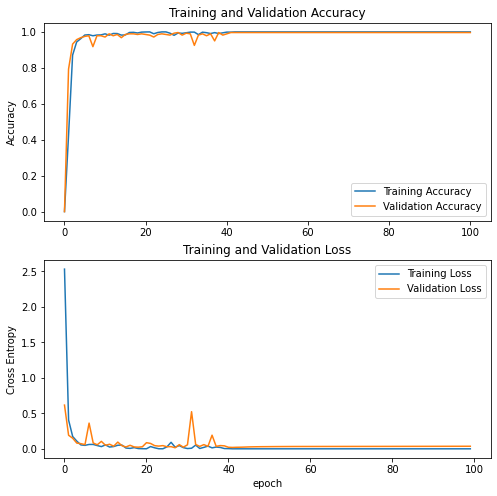

In [18]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [55]:
emotion_names=extracted_features_df['Emotions'].unique()


In [49]:
y_pred = ANN_Model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

9/9 [==============================] - 0s 4ms/step


array([6, 3, 3, 6, 2, 1, 5, 0, 4, 6, 6, 6, 3, 6, 3, 2, 3, 5, 1, 6, 5, 0,
       2, 5, 3, 2, 6, 4, 0, 5, 4, 2, 0, 3, 3, 2, 1, 4, 0, 5, 2, 0, 3, 1,
       5, 2, 0, 4, 5, 3, 1, 4, 4, 2, 6, 6, 2, 4, 2, 1, 6, 5, 5, 4, 6, 4,
       0, 1, 5, 3, 6, 2, 1, 6, 0, 5, 4, 5, 3, 0, 3, 0, 0, 5, 5, 4, 1, 1,
       5, 2, 1, 3, 6, 4, 0, 5, 4, 6, 6, 3, 3, 5, 6, 6, 5, 3, 5, 2, 3, 5,
       4, 4, 4, 0, 3, 2, 0, 0, 6, 2, 3, 5, 4, 0, 3, 5, 0, 5, 3, 6, 6, 2,
       1, 6, 6, 0, 3, 0, 6, 4, 0, 6, 4, 4, 0, 5, 4, 0, 4, 3, 5, 6, 4, 5,
       6, 6, 3, 3, 3, 1, 4, 2, 4, 1, 1, 1, 4, 0, 0, 6, 0, 1, 1, 2, 1, 3,
       4, 0, 6, 0, 4, 6, 0, 3, 5, 5, 5, 1, 4, 1, 2, 0, 1, 4, 2, 6, 5, 4,
       2, 6, 6, 6, 2, 5, 3, 5, 2, 2, 3, 4, 0, 0, 3, 5, 2, 0, 2, 0, 5, 5,
       5, 1, 2, 4, 3, 5, 0, 3, 6, 2, 5, 5, 0, 6, 2, 1, 2, 2, 3, 6, 5, 4,
       0, 2, 1, 0, 1, 4, 5, 4, 3, 6, 2, 2, 6, 1, 6, 3, 2, 4, 6, 4, 1, 0,
       3, 2, 1, 5, 6, 0, 3, 1, 4, 2, 3, 5, 0, 5, 4, 5], dtype=int64)

In [50]:
y_check=np.argmax(y_test,axis=1)
y_check

array([6, 3, 3, 6, 2, 1, 5, 0, 4, 6, 6, 6, 3, 6, 3, 2, 3, 5, 1, 6, 5, 0,
       2, 5, 3, 2, 6, 4, 0, 5, 4, 2, 0, 3, 3, 2, 1, 4, 0, 5, 2, 0, 3, 1,
       5, 2, 0, 4, 5, 3, 1, 4, 4, 2, 6, 6, 2, 4, 2, 1, 6, 5, 5, 4, 6, 4,
       0, 1, 5, 3, 6, 2, 1, 6, 0, 5, 4, 5, 3, 0, 3, 0, 0, 5, 5, 4, 1, 1,
       5, 2, 1, 3, 6, 4, 0, 5, 4, 6, 6, 3, 3, 5, 6, 6, 5, 3, 5, 2, 3, 5,
       4, 4, 4, 0, 3, 2, 0, 0, 6, 2, 3, 5, 4, 0, 3, 5, 0, 5, 3, 6, 6, 2,
       1, 6, 6, 0, 3, 0, 6, 4, 0, 6, 4, 4, 0, 5, 4, 0, 4, 3, 5, 6, 4, 5,
       6, 6, 0, 3, 3, 1, 4, 2, 4, 1, 1, 1, 4, 0, 0, 6, 0, 1, 1, 2, 1, 3,
       4, 0, 6, 0, 4, 6, 0, 3, 5, 5, 5, 1, 4, 1, 2, 0, 1, 4, 2, 6, 5, 4,
       2, 6, 6, 6, 2, 5, 3, 5, 2, 2, 3, 4, 0, 0, 3, 5, 2, 0, 2, 0, 5, 5,
       5, 1, 2, 4, 3, 5, 0, 3, 6, 2, 5, 5, 0, 6, 2, 1, 2, 2, 3, 6, 5, 4,
       0, 2, 1, 0, 1, 4, 5, 4, 3, 6, 2, 2, 6, 1, 6, 3, 2, 4, 6, 4, 1, 0,
       3, 2, 1, 5, 6, 0, 3, 1, 4, 2, 3, 5, 0, 5, 4, 5], dtype=int64)

In [52]:
loss,accuracy=ANN_Model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.036100249737501144
Test Accuracy: 0.9964285492897034


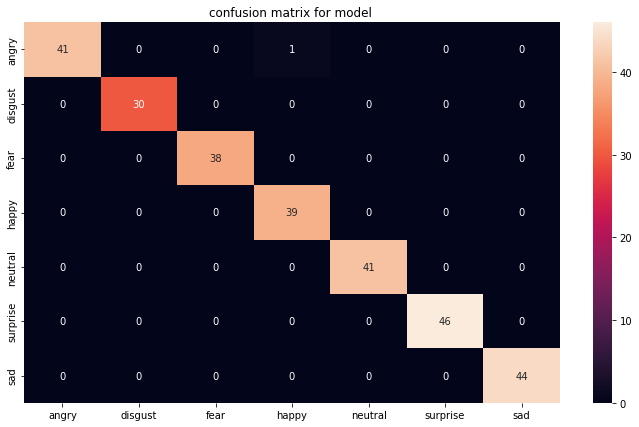

In [56]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [57]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

       angry       1.00      0.98      0.99        42
     disgust       1.00      1.00      1.00        30
        fear       1.00      1.00      1.00        38
       happy       0.97      1.00      0.99        39
     neutral       1.00      1.00      1.00        41
    surprise       1.00      1.00      1.00        46
         sad       1.00      1.00      1.00        44

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

